# Use the Dawson model to make human clearance predictions

- Created by: Grace Patlewicz
- Date: 03 May 2024
- Created relevant input files that are needed in order to make predictions. Use the Dawson public repo and the PFAS_ML_MakePredictions to derive predictions for the full inventory. Note this relies on OPERA predictions, as similarity dataframe created using EndoSimilarities based on PubChem and Morgan fingerprints AND ToxPrints. The latter are generated using the Corina Symphony as housed in a Docker image.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl
%matplotlib inline

In [2]:
TOP = os.getcwd().replace('notebooks','')
raw_dir= TOP + 'data/raw/'
processed_dir = TOP + 'data/processed/'
external_dir = TOP + 'data/external/'
interim_dir = TOP + 'data/interim/'
figures_dir = TOP + 'reports/figures/'

In [3]:
import pubchempy as pcp

from rdkit import DataStructs, Chem
from rdkit.Chem import AllChem


In [6]:
df = pd.concat([new_inv, degs])

In [7]:
#f.columns.tolist()

In [8]:
df = df[['MoleculeID',
 'MolWeight','LogP_pred',
 'AD_LogP','LogVP_pred',
 'AD_VP',
 'LogWS_pred',
 'AD_WS', 'LogKOA_pred',
 'AD_KOA','LogD74_pred',
 'AD_LogD','LogD74_predRange']]

In [9]:
df.rename(columns = {'MoleculeID': 'DTXSID', 'MolWeight': 'AVERAGE_MASS'}, inplace = True)

In [10]:
df

,DTXSID,AVERAGE_MASS,LogP_pred,AD_LogP,LogVP_pred,AD_VP,LogWS_pred,AD_WS,LogKOA_pred,AD_KOA,LogD74_pred,AD_LogD,LogD74_predRange
0,DTXSID70951853,97.997949,0.73,1,2.49,1,-0.94,1,1.30,1,0.73,0,[0.54:0.92]
1,DTXSID60883371,102.009263,0.27,1,3.48,1,-2.12,1,0.43,1,0.27,0,[-1.02:1.48]
2,DTXSID10445908,112.049985,3.11,1,3.63,1,-2.91,1,1.65,1,3.11,0,[1.73:4.49]
3,DTXSID20635191,113.045234,0.31,1,2.47,1,-0.99,1,3.39,1,0.23,0,[-5.5:5.96]
4,DTXSID00192272,114.009263,2.76,1,3.62,1,-2.37,1,1.29,1,2.76,0,[2.41:3.11]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,ZZKOWTIHKUWUOI-UHFFFAOYSA-N,255.015471,2.11,1,-3.43,1,-2.74,1,7.78,1,1.54,1,[-2.04:5.12]
3421,ZZQYDYODFHABLC-UHFFFAOYSA-N,143.995362,3.43,1,2.69,1,-2.30,1,2.69,1,3.43,0,[2.89:3.93]
3422,ZZWKTJZMSCLBFA-UHFFFAOYSA-N,430.086250,2.56,1,-6.41,1,-0.73,1,8.63,0,-1.86,0,[-8.4:4.68]
3423,ZZXFGOSSISMSPC-UHFFFAOYSA-N,327.978198,4.86,1,-4.93,1,-3.57,0,6.03,1,4.18,0,[1.26:7.1]


In [7]:
df1 = pd.read_excel(interim_dir+'universe_020524.xlsx', sheet_name = 'universe', index_col = [0])

In [10]:
df2 = df1[['dtxsid', 'Substance_Name', 'Substance_CASRN', 'smiles','QSAR_READY_SMILES', 'MolWeight','LogP_pred',
 'AD_LogP','LogVP_pred',
 'AD_VP',
 'LogWS_pred',
 'AD_WS', 'LogKOA_pred',
 'AD_KOA','LogD74_pred',
 'AD_LogD','LogD74_predRange']]

In [11]:
df2.rename(columns = {'dtxsid': 'DTXSID', 'MolWeight': 'AVERAGE_MASS'}, inplace = True)

/tmp/ipykernel_928155/3059414586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns = {'dtxsid': 'DTXSID', 'MolWeight': 'AVERAGE_MASS'}, inplace = True)


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15612 entries, 0 to 3387
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DTXSID             15612 non-null  object 
 1   Substance_Name     13054 non-null  object 
 2   Substance_CASRN    13054 non-null  object 
 3   smiles             15612 non-null  object 
 4   QSAR_READY_SMILES  15181 non-null  object 
 5   AVERAGE_MASS       15181 non-null  float64
 6   LogP_pred          2908 non-null   float64
 7   AD_LogP            15181 non-null  float64
 8   LogVP_pred         4767 non-null   float64
 9   AD_VP              15181 non-null  float64
 10  LogWS_pred         15181 non-null  float64
 11  AD_WS              15181 non-null  float64
 12  LogKOA_pred        15181 non-null  float64
 13  AD_KOA             15181 non-null  float64
 14  LogD74_pred        2908 non-null   float64
 15  AD_LogD            15181 non-null  float64
 16  LogD74_predRange   2908

In [13]:
df2.to_csv('/home/grace/Downloads/CompTox-PFASHalfLife-main/new_inv_april2024.csv')

In [14]:
endo = pd.read_excel('/home/grace/Downloads/CompTox-PFASHalfLife-main/Predictors/EndoSimilarity/SimEndChems_frommodel_DED05272020_test.xlsx', sheet_name = 'adding SMILES')

In [15]:
endo.columns = ['Compound ', 'CASRN', 'DTXSID',
       'QSAR_READY_SMILES']

In [16]:
dawsonAll = endo.copy()

In [17]:
#dawsonAll

In [18]:
#dawsonAll['QSAR_READY_SMILES_H'] = dawsonAll['QSAR_READY_SMILES'].str.replace('F', 'H') 

In [19]:
dawsonAll = dawsonAll.set_index('DTXSID')

In [20]:
for dtx in dawsonAll.index:
    smile = dawsonAll.loc[dtx,'QSAR_READY_SMILES']
    # PubChem FP
    try:
        cmpd = pcp.get_compounds(smile, 'smiles')[0]
        #pfp = DataStructs.CreateFromBitString(cmpd.cactvs_fingerprint)
        pfp = cmpd.cactvs_fingerprint
        dawsonAll.loc[dtx,'PubChemFP'] = pfp
    except:
        print("PubChem FP not calculated for %s" %dtx)
    # Morgan FP
    try:
        #smile_m=smile.replace("(",'').replace(")",'').replace("=",'').replace("H",'')
        #m = Chem.MolFromSmiles(smile_m)
        m = Chem.MolFromSmiles(smile)
        dawsonAll.loc[dtx,'MorganFP'] = m
    except:
        print("Morgan FP not calculated for %s" %dtx)

In [21]:
#dawsonAll

In [22]:
df2['smiles_H'] = df2['smiles'].str.replace('F', 'H') 

/tmp/ipykernel_928155/415242326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['smiles_H'] = df2['smiles'].str.replace('F', 'H')


In [23]:
df2 = df2.set_index('DTXSID')

In [24]:
#df2

In [25]:
for dtx in df2.index:
    errors = []
    smile = df2.loc[dtx,'smiles_H']
    # PubChem FP
    try:
        cmpd = pcp.get_compounds(smile, 'smiles')[0]
        #pfp = DataStructs.CreateFromBitString(cmpd.cactvs_fingerprint)
        pfp = cmpd.cactvs_fingerprint
        df2.loc[dtx,'PubChemFP'] = pfp
    except:
        errors.append([dtx])
    # Morgan FP
    try:
        smile_m=smile.replace("(",'').replace(")",'').replace("=",'').replace("H",'')
        m = Chem.MolFromSmiles(smile_m)
        #m = Chem.MolFromSmiles(smile)
        df2.loc[dtx,'MorganFP'] = m
    except:
        errors.append([dtx])

[15:16:58] Explicit valence for atom # 5 Cl, 2, is greater than permitted
[15:16:58] Explicit valence for atom # 3 Cl, 2, is greater than permitted
[15:17:01] Explicit valence for atom # 5 Cl, 2, is greater than permitted
[15:17:01] Explicit valence for atom # 8 Cl, 2, is greater than permitted
[15:17:03] Explicit valence for atom # 2 Cl, 2, is greater than permitted
[15:17:05] Explicit valence for atom # 12 Cl, 2, is greater than permitted
[15:17:06] Explicit valence for atom # 15 Cl, 2, is greater than permitted
[15:17:06] Explicit valence for atom # 5 O, 3, is greater than permitted
[15:17:07] Explicit valence for atom # 18 O, 3, is greater than permitted
[15:17:07] Explicit valence for atom # 2 Cl, 2, is greater than permitted
[15:17:08] Explicit valence for atom # 3 Cl, 2, is greater than permitted
[15:17:09] Explicit valence for atom # 14 Cl, 2, is greater than permitted
[15:17:10] Explicit valence for atom # 2 Cl, 2, is greater than permitted
[15:17:12] SMILES Parse Error: synta

In [26]:
similarity = pd.DataFrame(columns=['CASRN', 'DTXSID', 'ENDO CASRN (EPA-PFAS)',\
                                   'ENDO DTXSID (EPA-PFAS)', 'Tanimoto Score (PubChem)', 'Tanimoto Score (Morgan)']) 
i = 0
for dtx1 in dawsonAll.index:
    try:
        pfp1 = DataStructs.CreateFromBitString(dawsonAll.loc[dtx1, 'PubChemFP'])
    except:
        pass          
    mfp1 = AllChem.GetMorganFingerprintAsBitVect(dawsonAll.loc[dtx1, 'MorganFP'],2,nBits=1024)
    for dtx2 in df2.index:
        i=i+1            
        similarity.loc[i,'DTXSID'] = dtx1
        similarity.loc[i,'CASRN'] = dawsonAll.loc[dtx1, 'CASRN']
        similarity.loc[i,'ENDO DTXSID (EPA-PFAS)'] = dtx2
        #similarity.loc[i, 'ENDO CASRN (EPA-PFAS)'] = df3.loc[dtx2, 'CASRN']
        try:
            pfp2 = DataStructs.CreateFromBitString(df2.loc[dtx2, 'PubChemFP'])
            pscore = DataStructs.FingerprintSimilarity(pfp1, pfp2)
            similarity.loc[i,'Tanimoto Score (PubChem)'] = pscore
        except:
            pass#print("PubChem FP Similarity not calculated for %s-%s" %(cas1,cas2))
        try:
            mfp2 = AllChem.GetMorganFingerprintAsBitVect(df2.loc[dtx2, 'MorganFP'],2,nBits=1024)
            mscore = DataStructs.FingerprintSimilarity(mfp1, mfp2)
            similarity.loc[i,'Tanimoto Score (Morgan)'] = mscore
        except:
            pass#print("Morgan FP Similarity not calculated for %s-%s" %(cas1,cas2))


In [31]:
#similarity.to_csv('/home/grace/Downloads/CompTox-PFASHalfLife-main/Predictors/EndoSubset-EPA_PFAS-OPPT.csv')

In [31]:
similarity.to_csv('/home/grace/Downloads/CompTox-PFASHalfLife-main/Predictors/OSCPP_new_Endo.csv')

In [32]:
similarity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140508 entries, 1 to 140508
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   CASRN                     140508 non-null  object
 1   DTXSID                    140508 non-null  object
 2   ENDO CASRN (EPA-PFAS)     0 non-null       object
 3   ENDO DTXSID (EPA-PFAS)    140508 non-null  object
 4   Tanimoto Score (PubChem)  48717 non-null   object
 5   Tanimoto Score (Morgan)   110583 non-null  object
dtypes: object(6)
memory usage: 11.5+ MB


Last step of the predictions generated with the R script are to filter for all human predictions by the oral route irrespective of species so that the most conservative estimate of clearance is used irrespective of whether the prediction is in the AD of the model or not. This ensures that there is a single value per chemical.

In [33]:
human = pd.read_csv(external_dir+'Dawson_human_predictions_030524.csv', index_col = [0])

In [34]:
human.shape

(15602, 2)

In [37]:
human.columns

Index(['DTXSID', 'max_Cl'], dtype='object')

In [38]:
human.max_Cl.unique()

array([4, 2, 3])

In [39]:
human.max_Cl.value_counts(normalize = True)

4    0.685553
2    0.175298
3    0.139149
Name: max_Cl, dtype: float64

In [47]:
universe = pd.read_excel(interim_dir+'final_landscape_with_predicted_NAMs_091123.xlsx' , index_col = [0])

In [48]:
universe.shape

(15414, 124)

In [50]:
human.shape

(15093, 1)

In [52]:
universe = pd.merge(universe, human, left_on = 'dtxsid', right_on = human.index, how = 'left')

In [55]:
universe['med_class'].value_counts(dropna = False, normalize = True)

4.0    0.757493
2.0    0.179188
3.0    0.042429
NaN    0.020890
Name: med_class, dtype: float64

In [56]:
myresults = {}
for i, group in universe.groupby('group_str'):
    myresults[i] = group

In [60]:
universe.columns

Index(['dtxsid', 'DSSTox_QC-Level', 'Substance_Name', 'Substance_CASRN',
       'Substance_Type', 'smiles', 'Structure_InChI', 'Structure_InChIKey',
       'Structure_Formula', 'Structure_MolWt',
       ...
       'pred_NR_ESR1', 'pred_NR_NRF2', 'pred_NR_PPAR', 'pred_NR_PXR',
       'pred_NR_RXR', 'pred_No flag', 'pred_TK_PlasBind', 'pred_ZF',
       'pred_hDIO1', 'med_class'],
      dtype='object', length=125)

In [62]:
case_study = myresults["('PFAAs', 'gte7', nan, nan)"].set_index('dtxsid').iloc[:,3:][['pred_NR_ESR1', 'pred_NR_NRF2', 'pred_NR_PPAR', 'pred_NR_PXR',
       'pred_NR_RXR', 'pred_No flag', 'pred_TK_PlasBind', 'pred_ZF',
       'pred_hDIO1', 'med_class']]

In [64]:
case_study['pred_TK_halflife'] = case_study['med_class'].apply(lambda x: 1 if x == 4 else 0 if x in [2,3] else np.nan)

In [70]:
case_study.drop(['med_class'], axis = 1, inplace = True)

In [90]:
myresults["('Other aliphatics', 'lt7', 2.0, 1.0)"].med_class.value_counts()

4.0    60
2.0    38
3.0     8
Name: med_class, dtype: int64

In [91]:
case_study2 = myresults["('Other aliphatics', 'lt7', 2.0, 1.0)"].set_index('dtxsid').iloc[:,3:][['pred_NR_ESR1', 'pred_NR_NRF2', 'pred_NR_PPAR', 'pred_NR_PXR',
       'pred_NR_RXR', 'pred_No flag', 'pred_TK_PlasBind', 'pred_ZF',
       'pred_hDIO1', 'med_class']]
case_study2['pred_TK_halflife'] = case_study2['med_class'].apply(lambda x: 1 if x == 4 else 0 if x in [2,3] else np.nan)
case_study2.drop(['med_class'], axis = 1, inplace = True)

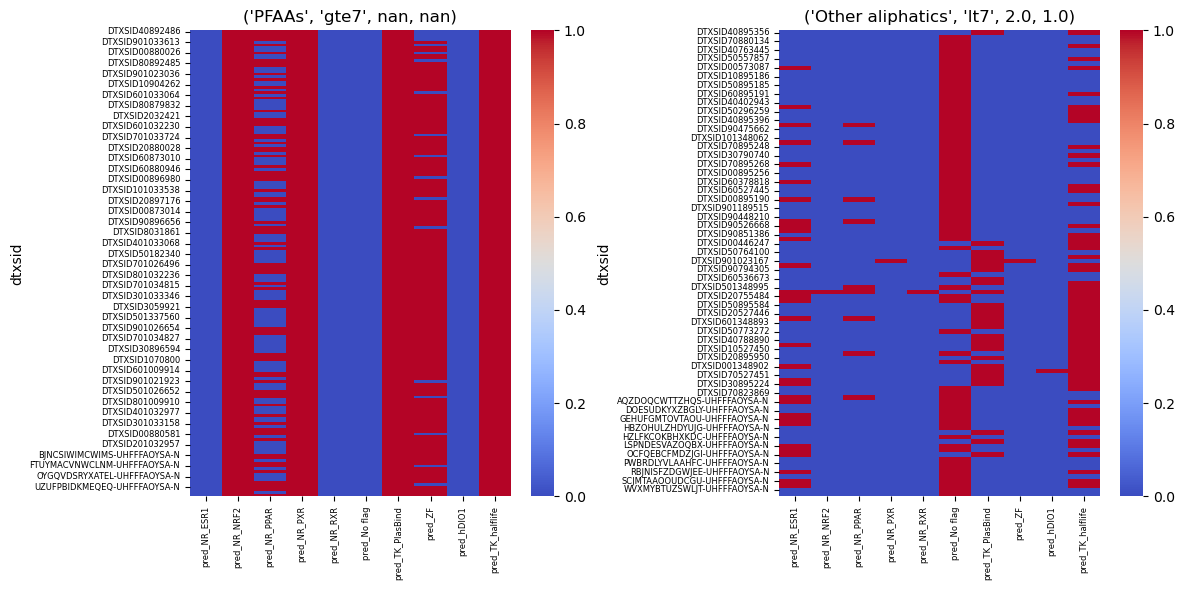

In [94]:
f1, (ax, ax1) = plt.subplots(1,2, figsize = (12,6) )
ax.tick_params(axis='x', labelsize=6)
ax1.tick_params(axis='x', labelsize=6)
ax.tick_params(axis='y', labelsize=6)
ax1.tick_params(axis='y', labelsize=6)
ax.set_title("('PFAAs', 'gte7', nan, nan)")
ax1.set_title("('Other aliphatics', 'lt7', 2.0, 1.0)")
sns.heatmap(case_study, cmap = 'coolwarm', ax = ax)
sns.heatmap(case_study2, cmap = 'coolwarm', ax = ax1)
plt.tight_layout()

In [130]:
case_study.to_csv('/home/grace/Downloads/CompTox-PFASHalfLife-main/case_study.csv')
case_study2.to_csv('/home/grace/Downloads/CompTox-PFASHalfLife-main/case_study2.csv')              

In [134]:
case_study2.isnull().sum()

pred_NR_ESR1        0
pred_NR_NRF2        0
pred_NR_PPAR        0
pred_NR_PXR         0
pred_NR_RXR         0
pred_No flag        0
pred_TK_PlasBind    0
pred_ZF             0
pred_hDIO1          0
pred_TK_halflife    0
dtype: int64

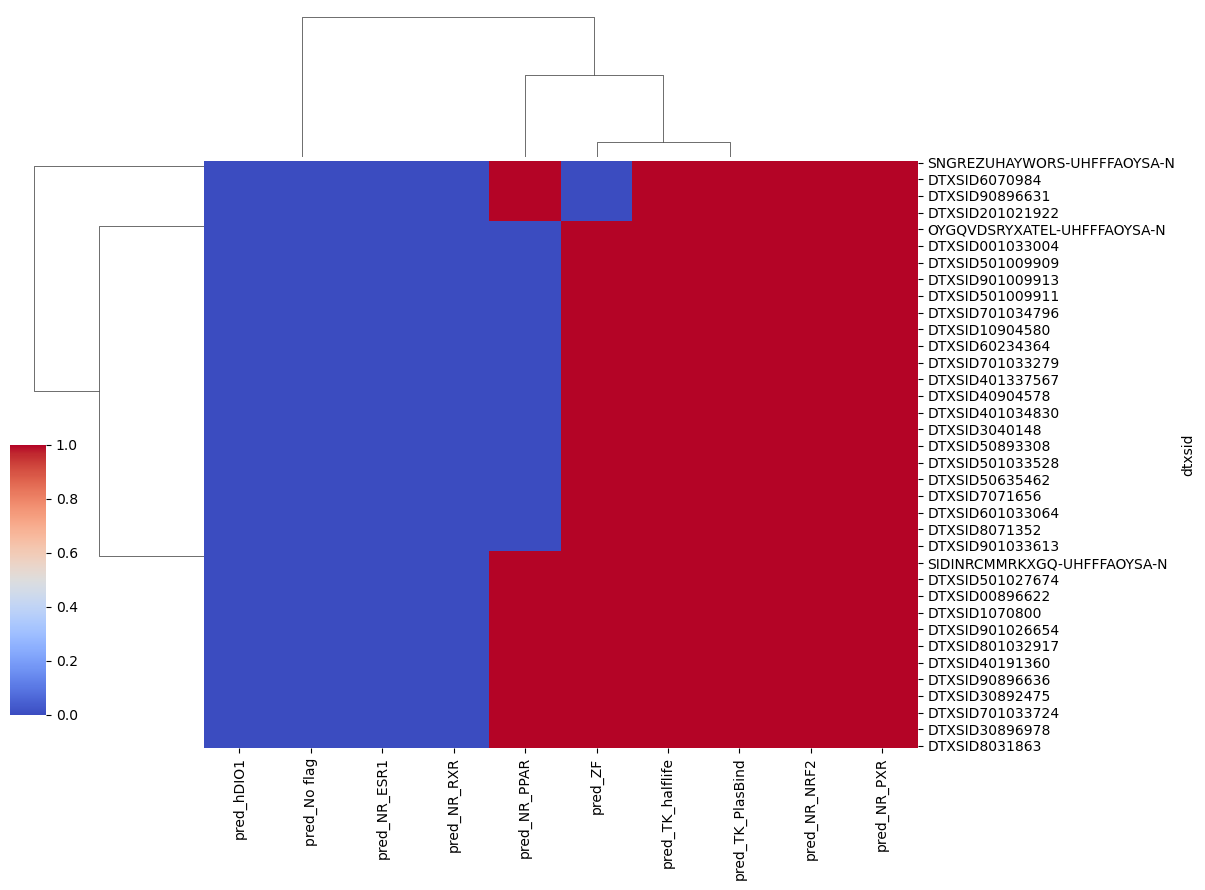

In [129]:

#ax.tick_params(axis='x', labelsize=6)
#ax1.tick_params(axis='x', labelsize=6)
#ax.tick_params(axis='y', labelsize=6)
#ax1.tick_params(axis='y', labelsize=6)

g = sns.clustermap(case_study, method = 'average', metric = 'jaccard',cmap = 'coolwarm',cbar_pos=(0, .2, .03, .3), figsize=(12,9))

#g.ax_heatmap.set_title("('PFAAs', 'gte7', nan, nan)")
